In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load the training and testing data
trainX = np.loadtxt('trainX.txt', dtype=np.uint8)
testX = np.loadtxt('testX.txt', dtype=np.uint8)
trainY = np.loadtxt('trainY.txt', dtype=np.uint8)
testY = np.loadtxt('testY.txt', dtype=np.uint8)
print("Shape of trainX:", trainX.shape)
print("Shape of trainY:", trainY.shape)
print("Shape of testX:", testX.shape)
print("Shape of testY:", testY.shape)

Shape of trainX: (500, 256)
Shape of trainY: (500,)
Shape of testX: (100, 256)
Shape of testY: (100,)


In [3]:
# Reshape the images from 1D to 2D (16x16)
trainX = trainX.reshape(-1, 16, 16, order='F')
testX = testX.reshape(-1, 16, 16, order='F')

# Find indices of samples with label 2 and 4 in trainY
digit2_indices = np.where(trainY == 2)[0]
digit4_indices = np.where(trainY == 4)[0]

# Use these indices to extract corresponding images
digit2_train = trainX[digit2_indices]
digit4_train = trainX[digit4_indices]
print("TrainX:   ",trainX.shape)
print("TestX:   ",testX.shape)
print("Digit2_indices:   ",digit2_indices.shape)
print("Digit4 indices:   ",digit4_indices.shape)
print("Digit2 TrainX:   ",digit2_train.shape)
print("Digit4 Train:   ",digit4_train.shape)

TrainX:    (500, 16, 16)
TestX:    (100, 16, 16)
Digit2_indices:    (250,)
Digit4 indices:    (250,)
Digit2 TrainX:    (250, 16, 16)
Digit4 Train:    (250, 16, 16)


In [4]:
digit2_one_probability = digit2_train.sum(axis=0) / digit2_train.shape[0]
digit2_zero_probability = 1 - digit2_one_probability

digit4_one_probability = digit4_train.sum(axis=0) / digit4_train.shape[0]
digit4_zero_probability = 1 - digit4_one_probability

In [5]:
# Predict the labels for test data 

def predict_labels(test_data):
    # Calculate likelihood for digit 2
    probability_digit2 = np.prod(test_data * digit2_one_probability + (1-test_data) * digit2_zero_probability, axis=(1, 2))

    # Calculate likelihood for digit 4
    probability_digit4 = np.prod(test_data * digit4_one_probability + (1-test_data) * digit4_zero_probability, axis=(1, 2))

    # Compare the likelihoods and make predictions
    predicted_labels = np.where(probability_digit2 > probability_digit4, 2, 4)
 
    return predicted_labels

predicted_labels = predict_labels(testX)


Overall Accuracy: 100.00%
Training Accuracy for Digit 2: 100.00%
Test Accuracy for Digit 2: 100.00%
Training Accuracy for Digit 4: 100.00%
Test Accuracy for Digit 4: 100.00%


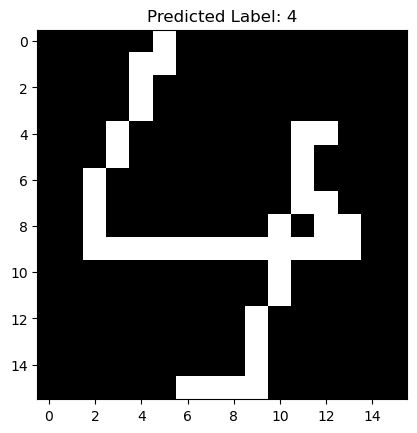

In [6]:
# Calculate the overall accuracy
overall_accuracy = (predicted_labels == testY).mean()
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Calculate training accuracy for digit 2
train_digit2_accuracy = (trainY[:250] == 2).mean()
print(f"Training Accuracy for Digit 2: {train_digit2_accuracy * 100:.2f}%")

# Calculate test accuracy for digit 2
test_digit2_accuracy = (predicted_labels[testY == 2] == 2).mean()
print(f"Test Accuracy for Digit 2: {test_digit2_accuracy * 100:.2f}%")

# Calculate training accuracy for digit 4
train_digit4_accuracy = (trainY[250:] == 4).mean()
print(f"Training Accuracy for Digit 4: {train_digit4_accuracy * 100:.2f}%")

# Calculate test accuracy for digit 4
test_digit4_accuracy = (predicted_labels[testY == 4] == 4).mean()
print(f"Test Accuracy for Digit 4: {test_digit4_accuracy * 100:.2f}%")

predicted_label = predicted_labels[99]

# Show the image using pyplot
from matplotlib import pyplot as plt
plt.imshow(testX[99], cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()